# 2.4 Least Squares

An interactive summary of Section 2.4 in __Discrete Inverse and State Estimation Problems__ by Carl Wunsch

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Below we reproduce Figure __2.2__. We generate synthetic data

In [2]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 3 # mean and standard deviation (variance is 9)
n = np.random.normal(mu, sigma, 50)

y = 1 + 2*t + n

The set of observations is written in matrix form:

$
\mathbf{Ex} + \mathbf{n} = \mathbf{y}
$
where $\mathbf{x} = [a \quad b]^T$ (__2.87__).

In [3]:
# Least-square fit of y
E = np.vstack([t, np.ones(len(t))]).T
b, a = np.linalg.lstsq(E, y, rcond=None)[0]
yLSQ = a + b*t

residuals = y - yLSQ

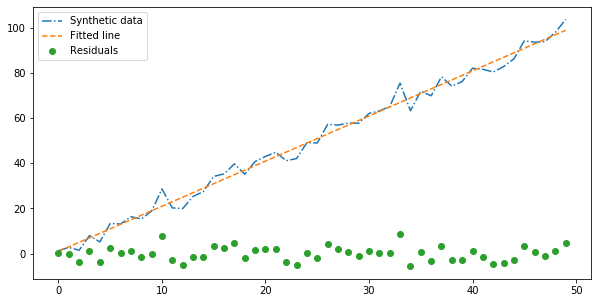

In [4]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We minimize the cost/objective/misfit function __2.89__ where $\mathbf{x}_i$ vary independently.

In [5]:
Ex = E@np.transpose( np.array([a, b]) )

J = np.transpose(y - Ex)@(y - Ex)

Since __2.93__ is true, we know that the columns of $\mathbf{E}$ are orthogonal to $\mathbf{n}$. We sovle the normal equations (by brute force below) to find an estimate for $\mathbf{x}$, $\tilde{\mathbf{x}}$, using __2.95__ and recover $\mathbf{x} = [a \quad b]^T$ within machine precision since our example is small compared with real problems.

In [6]:
xEst = np.linalg.inv(np.transpose(E)@E)@np.transpose(E)@y
print(xEst-[b,a])

[0.00000000e+00 1.99840144e-15]


Following the calculations to get to __2.99__, we can show that the residuals, $\tilde{\mathbf{n}}$, are orthogonal to the estimated solution, $\tilde{\mathbf{y}} = \mathbf{E}\tilde{\mathbf{x}}$. 

The estimated solution is the projection of the true solution onto the column space of the model problem, $\mathbf{E}$.

In [7]:
yEst = E@xEst
nEst = y - yEst

print("Showing orthogonailty within machine error:\t", nEst@yEst)
print("Versus the true values of n and y:\t\t", n@y)

Showing orthogonailty within machine error:	 -2.6830093702301383e-11
Versus the true values of n and y:		 267.4599367087642


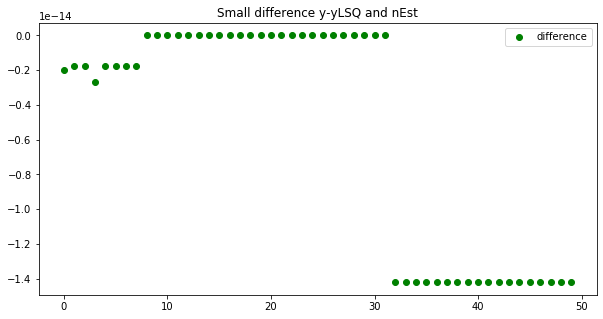

In [8]:
plt.figure(figsize=(10,5))
plt.plot(t, nEst-residuals, 'go', label='difference')
plt.legend()
plt.title("Small difference y-yLSQ and nEst")
plt.show()

Instead of generating synthetic data from a linear relationship, let's use a quadratic rule. We reproduce Figure __2.4__.

In [9]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 30 # mean and standard deviation (variance is 900)
n = np.random.normal(mu, sigma, 50)

y = 1 + t**2 + n

In [10]:
# Least-square fit of y
E = np.vstack([t, np.ones(len(t))]).T
b, a = np.linalg.lstsq(E, y, rcond=None)[0]
yLSQ = a + b*t

residuals = y - yLSQ

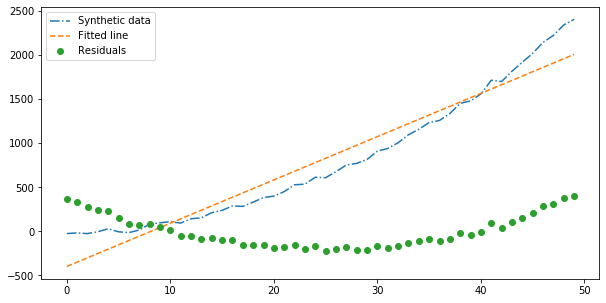

In [11]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We see that fitting with a linear rule does not give a good representation of our synthetic data. We should reject the straight-line fit because the residuals should be unstructured.

We add noise to the original example by increasing the variance from 9 to 900 to reproduce Figure __2.5__.

In [12]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 30 # mean and standard deviation (variance is 900)
n = np.random.normal(mu, sigma, 50)

y = 1 + 2*t + n

# Least-square fit of y
E = np.vstack([t, np.ones(len(t))]).T
b, a = np.linalg.lstsq(E, y, rcond=None)[0]
yLSQ = a + b*t

residuals = y - yLSQ

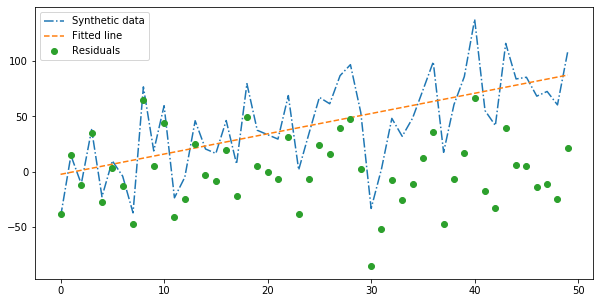

In [13]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We apply a quadratic fit to the quadratic model of synthetic data and show that the residuals are now unstructured. This allows us to validate the model as in Figure __2.6__. 

In [14]:
t = np.arange(50, dtype=np.float64)
mu, sigma = 0, 30 # mean and standard deviation (variance is 900)
n = np.random.normal(mu, sigma, 50)

y = 1 + t**2 + n

# Polynomial fit of y
coefficients = np.polyfit(t, y, 2)
yLSQ = np.polyval(coefficients, t)

residuals = y - yLSQ

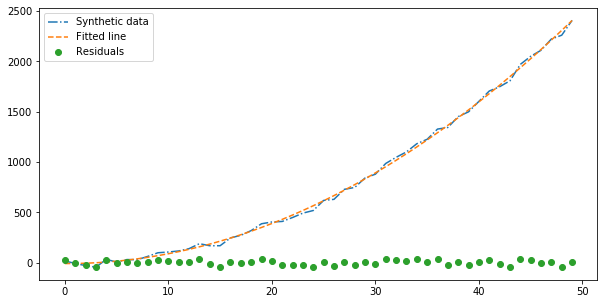

In [16]:
plt.figure(figsize=(10,5))
plt.plot(t, y, '-.', label='Synthetic data', markersize=5)
plt.plot(t, yLSQ, '--', label='Fitted line')
plt.plot(t, residuals, 'o', label='Residuals')
plt.legend()
plt.show()

We should expect a $\chi_1^2$ distributed behavior for each component of the cost function

$$
J = \sum^M_i n_i^2 = \mathbf{n}^T\mathbf{n}
$$

such that the residual, $n_i^2$, has a scaled expected value of $\langle n_i^2 \rangle = 1$. We check this by comparing histograms of each individual $n_i^2$ against the expected $\chi_1^2$ distribution.

Below we set up a problem for $\chi_1^2$ analysis following the example in the book. 

In [83]:
def leastSquares_solver(mean, var):
    # Number of equations
    numEqs = 30
    t = np.arange(numEqs, dtype=np.float64)
    n = np.random.normal(mu, np.sqrt(var), numEqs)

    y = 1 + t**2 + n

    # Polynomial fit of y
    coefficients = np.polyfit(t, y, 15)
    yLSQ = np.polyval(coefficients, t)

    n_tilde = y - yLSQ # residuals
    
    return n, n_tilde


In [96]:
mu, var = 0, 9

for i in range(50):
    if i == 0:
        n,n_tilde = leastSquares_solver(mu,var)
    else:
        new,new_tilde = leastSquares_solver(mu,var) 
        n = np.append(n,new)
        n_tilde = np.append(n_tilde,new_tilde)

In [112]:
from scipy import stats
x=np.linspace(0,40,100)
df=1

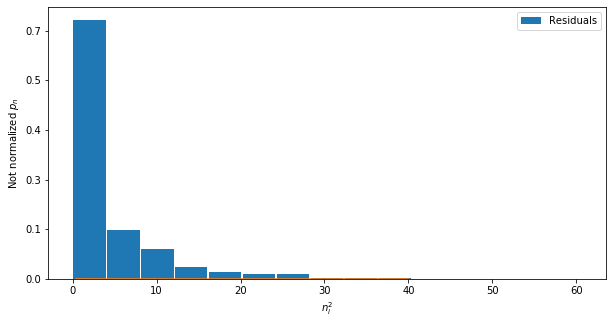

In [113]:
plt.figure(figsize=(10,5))
nn, bins, patches = plt.hist(n_tilde**2, 15, label='Residuals', rwidth=0.95)
plt.plot(x, stats.chi2.pdf(x,df))

# Change y axis to normalized
import matplotlib.ticker as mtick
def div_length(x, *args):
    x = float(x)/1500
    return "{:.1f}".format(x)    
# Apply to the major ticks of the y-axis the function that you defined. 
ax = plt.gca()       
ax.yaxis.set_major_formatter(mtick.FuncFormatter(div_length))

plt.legend()
plt.xlabel("$n_i^2$")
plt.ylabel("Not normalized $p_n$")
plt.show()

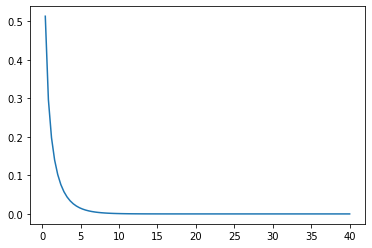

In [114]:
plt.plot(x, stats.chi2.pdf(x,df))